# Ciência de Dados e Programação Python
Avaliação Prática 2 : Visualização

 **Tarefa de Regressão:**


* 1 Carregar base de dados e aplicar/imprimir a árvore de decisão (3 pontos).
* 2 Selecionar um sub-conjunto de amostras seguindo algum dos filtros aprendidos pela árvore de decisão e gerar gráficos(3 pontos)
* 3 Discutir as informações obtidas e evidenciadas com os gráficos (4 pontos)


Importamos as bibliotecas necessárias:

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

Carregamos o dataset penguins.csv e criamos uma cópia do dataframe para trabalharmos:

In [4]:
#pinguins = pd.read_csv('https://raw.githubusercontent.com/LeonardoCorreia08/ProjectPenguins/main/penguins.csv')
pinguins = pd.read_csv("penguins.csv", sep=",")
pinguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [5]:
print(pinguins['sex'].unique())
print(pinguins['species'].unique())
print(pinguins['island'].unique())

['MALE' 'FEMALE' nan]
['Adelie' 'Chinstrap' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']


In [6]:
df = pinguins


Verificando se há valores faltantes e tratá-los

Normalizando os valores
- Para células vazias nas colunas bill_length_mm, bill_depth_mm, flipper_length_mm e body_mass_g inserimos como valor a média entre o valor anterior e posterior
- Para células vazias na coluna sex, inserimos como valor a moda da coluna

In [7]:

df['bill_length_mm'] = df['bill_length_mm'].fillna((df['bill_length_mm'].shift() + df['bill_length_mm'].shift(-1))/2)
df['bill_depth_mm'] = df['bill_depth_mm'].fillna((df['bill_depth_mm'].shift() + df['bill_depth_mm'].shift(-1))/2)
df['flipper_length_mm'] = df['flipper_length_mm'].fillna((df['flipper_length_mm'].shift() + df['flipper_length_mm'].shift(-1))/2)
df['body_mass_g'] = df['body_mass_g'].fillna((df['body_mass_g'].shift() + df['body_mass_g'].shift(-1))/2)
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])

In [8]:
df.head(500)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.70,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.40,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.00,195.0,3250.0,FEMALE
3,Adelie,Torgersen,38.5,18.65,194.0,3350.0,MALE
4,Adelie,Torgersen,36.7,19.30,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,47.0,14.00,214.5,4887.5,MALE
340,Gentoo,Biscoe,46.8,14.30,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.70,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.80,212.0,5200.0,FEMALE


In [9]:
df.to_csv('dataset.csv', index=False)

Convertemos as variáveis categóricas para numéricas

In [10]:
df["species"] = df["species"].replace({"Adelie": 0, "Chinstrap": 1, "Gentoo": 2})
df["island"] = df["island"].replace({"Biscoe": 0, "Dream": 1, "Torgersen": 2})
df["sex"] = df["sex"].str.lower().replace({"male": 0, "female": 1}).astype(int)

Visualizamos a matriz de correlação:

<Axes: >

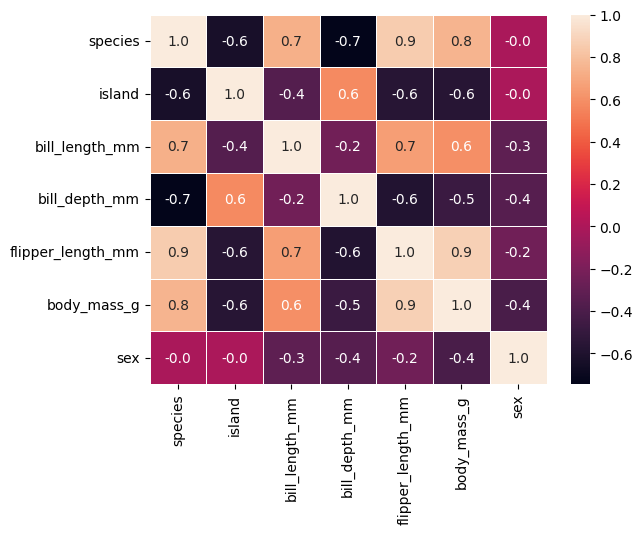

In [11]:
correlation = df.corr()
plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=0.6)
plot

Gerar gráficos com base nesse subconjunto de amostras e discutir as informações obtidas


Fizemos plot de diferentes gráficos, tais como:

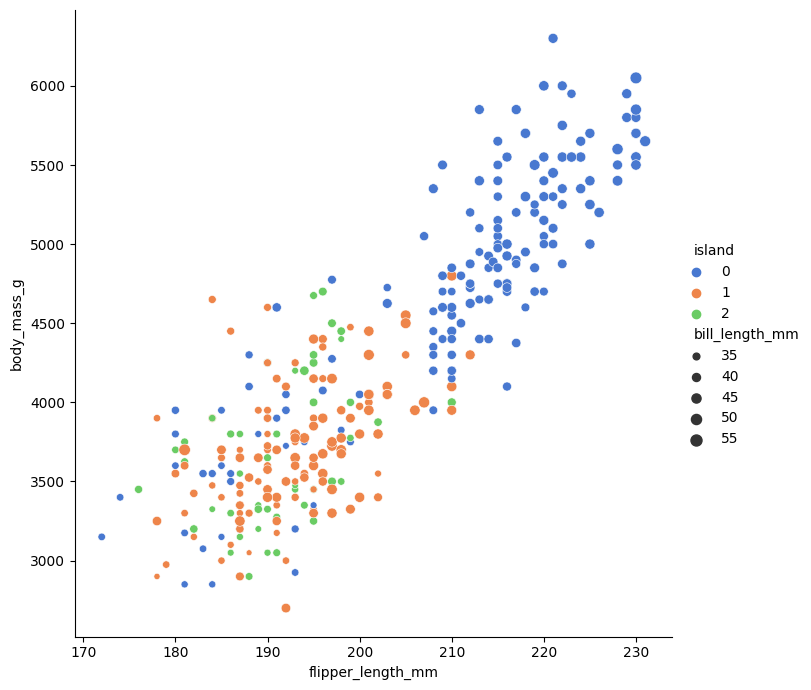

In [12]:
sns.relplot(x="flipper_length_mm", y="body_mass_g", data=pinguins, hue="island", size="bill_length_mm", palette='muted', height=7);

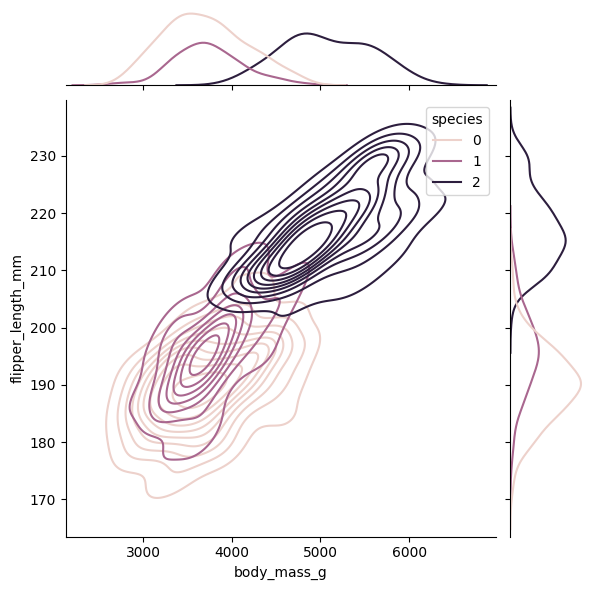

In [13]:
g = sns.jointplot(data=pinguins, x="body_mass_g", y="flipper_length_mm", hue="species", kind='kde');

<Figure size 1200x800 with 0 Axes>

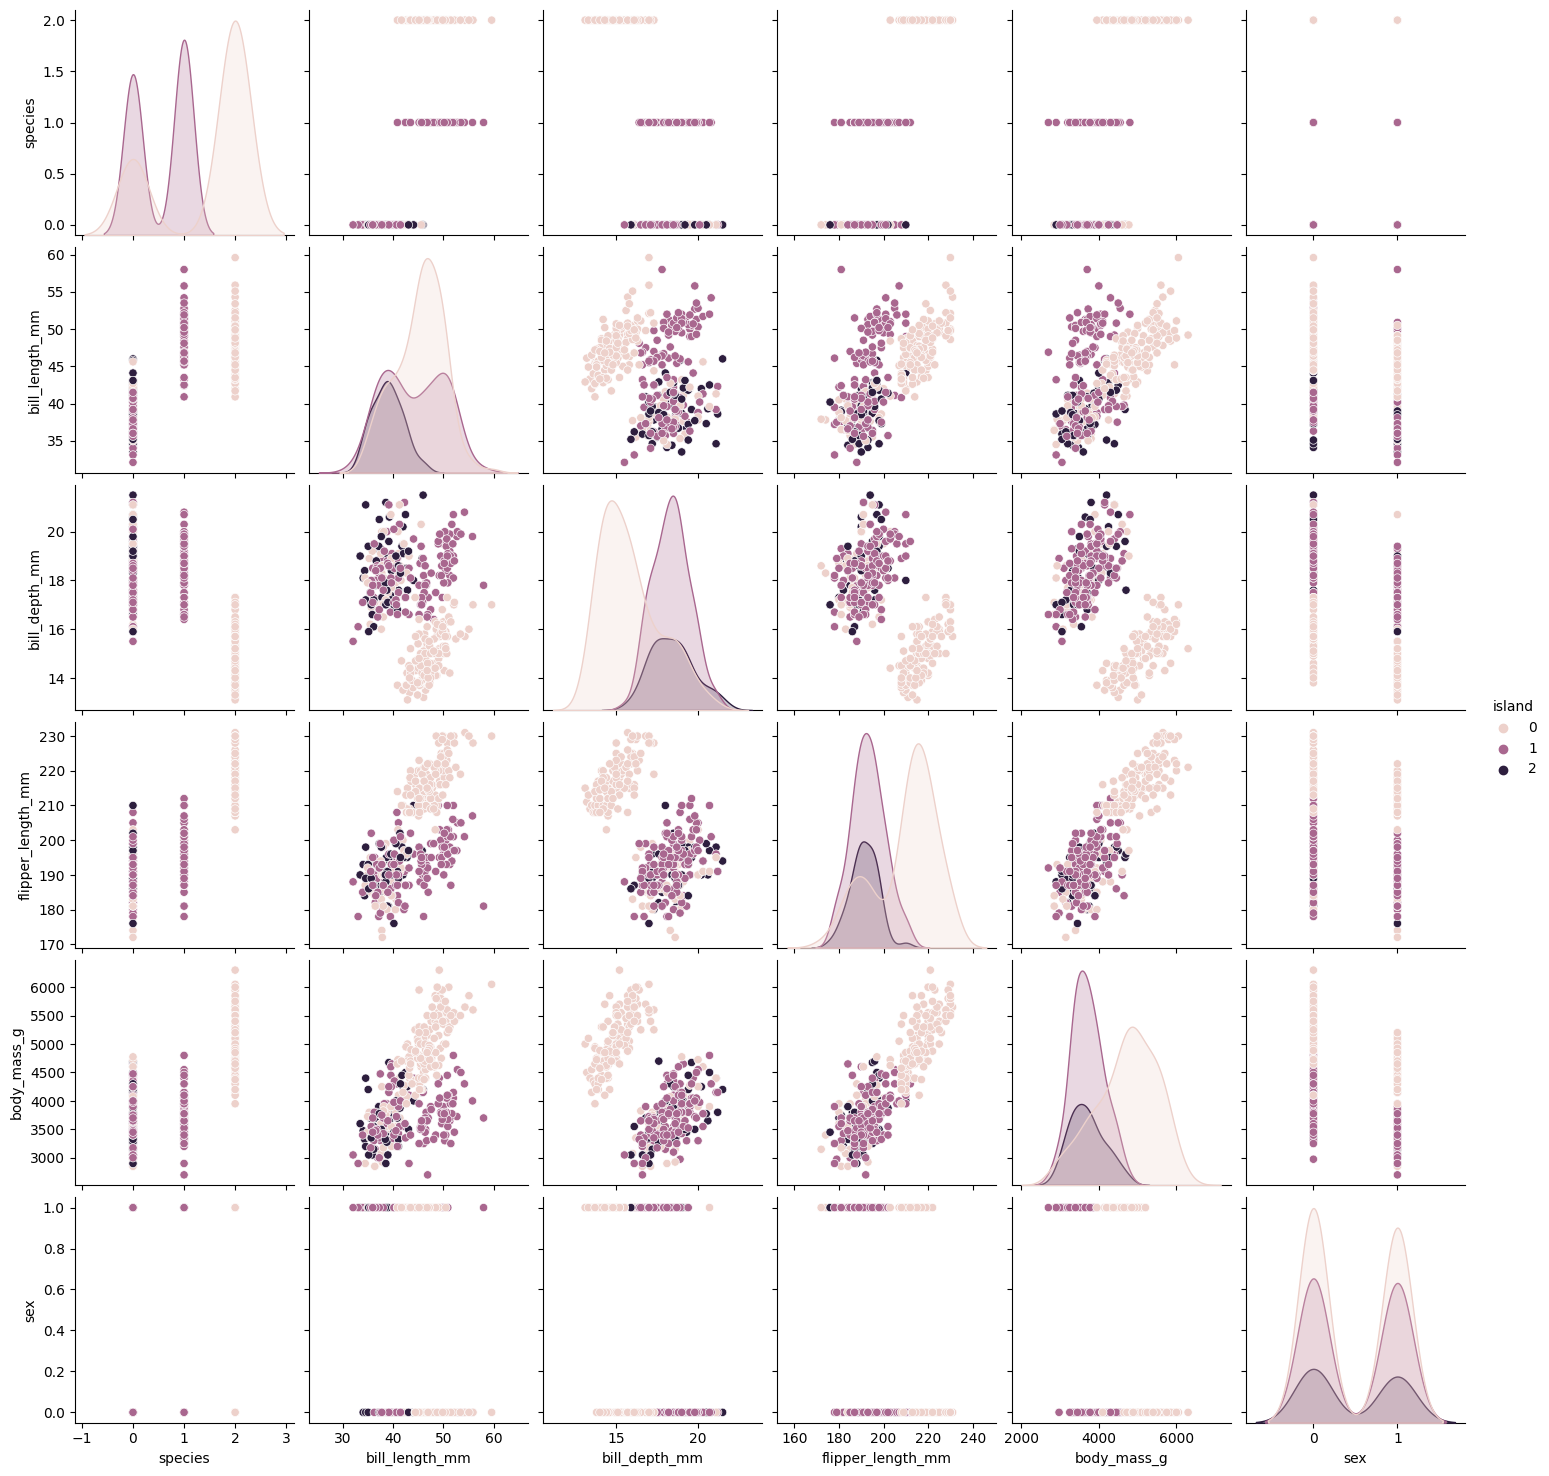

In [14]:
plt.figure(figsize=(12, 8))
sns.pairplot(pinguins, hue="island");

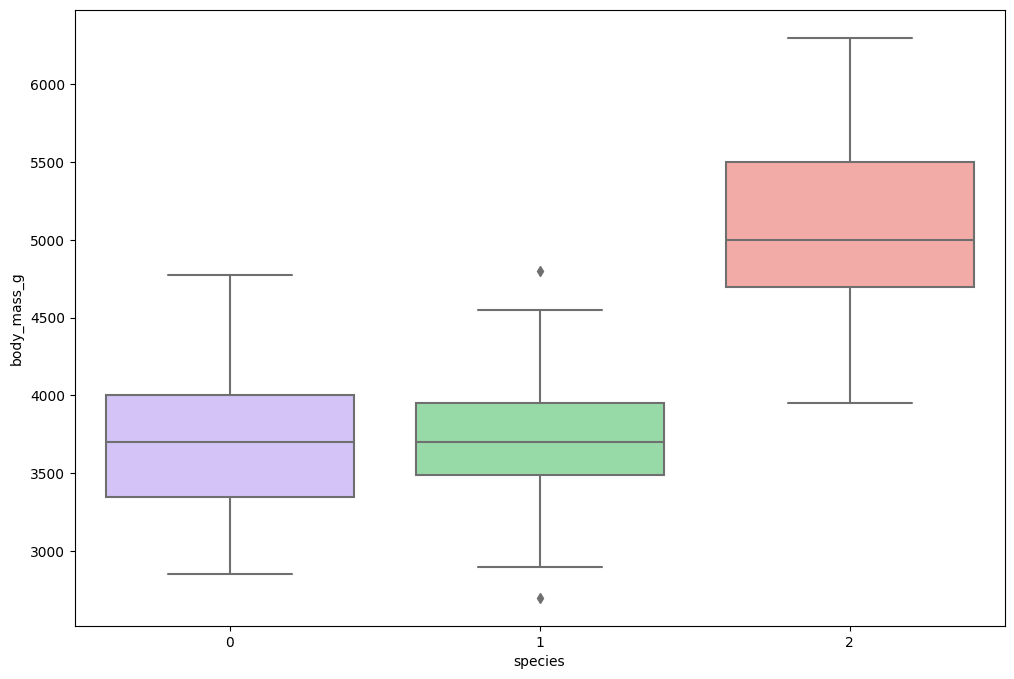

In [15]:
fig = plt.figure(figsize=(12, 8))
ax = plt.axes()

sns.set_theme(style="ticks", palette="pastel")

sns.boxplot(x="species", y="body_mass_g", palette=["m", "g", "r"],
            data=pinguins);

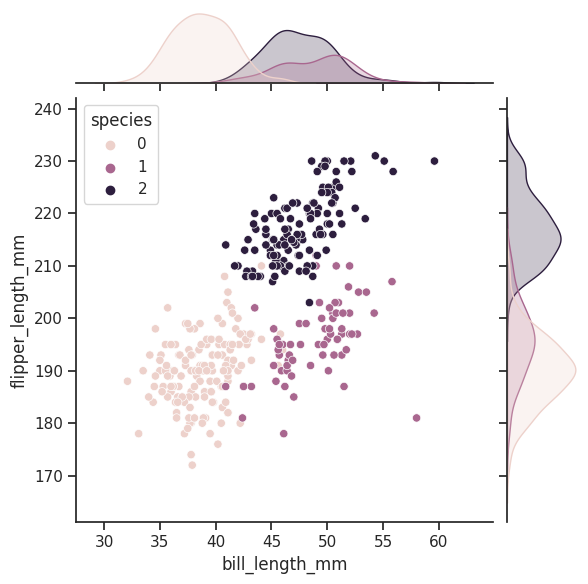

In [16]:
sns.jointplot(data=pinguins, x="bill_length_mm", y="flipper_length_mm", hue="species", kind='scatter');

<Figure size 1200x800 with 0 Axes>

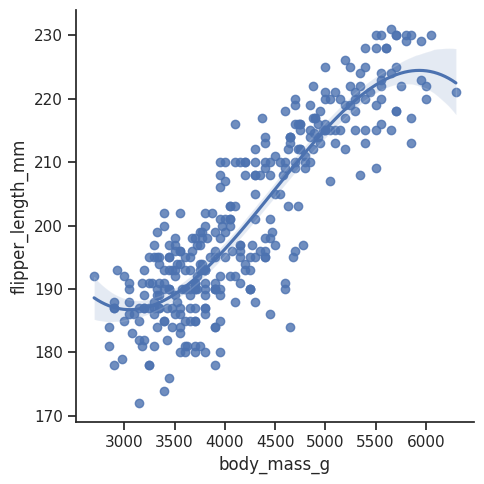

In [17]:
sns.set_theme(style="ticks", palette="deep")
fig = plt.figure(figsize=(12, 8))
sns.lmplot(x="body_mass_g", y="flipper_length_mm", data=pinguins, order=3);

<Axes: xlabel='body_mass_g', ylabel='Count'>

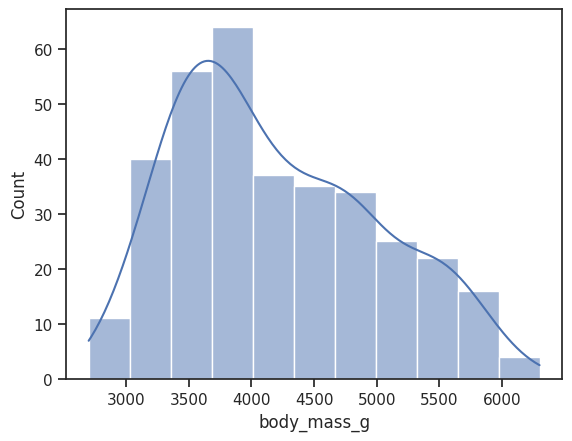

In [18]:
sns.histplot(pinguins["body_mass_g"],  kde=True)

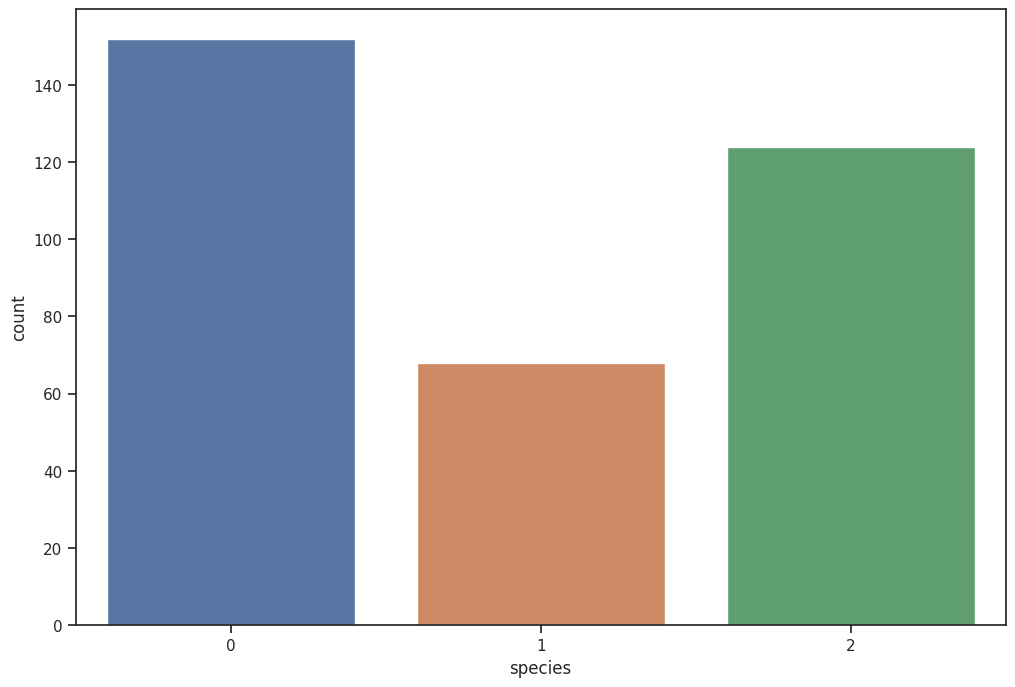

In [19]:
plt.figure(figsize=(12, 8))
sns.countplot(x="species", data=pinguins);

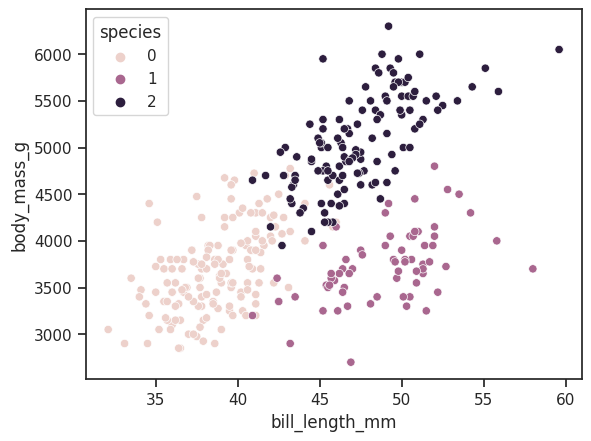

In [20]:
#Visualizando a relação entre o comprimento do bico e a massa corporal
sns.scatterplot(data=df, x='bill_length_mm', y='body_mass_g', hue='species')
plt.show()

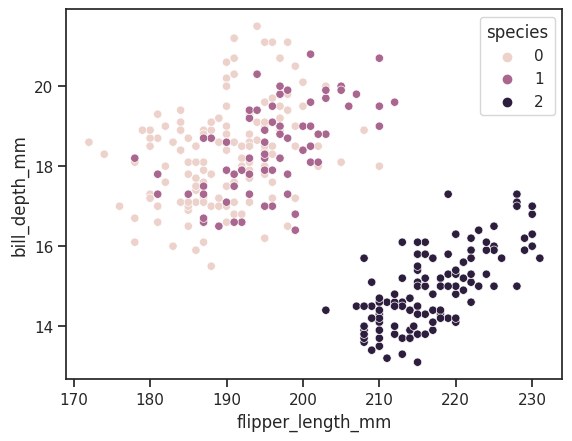

In [21]:
#Visualizando a relação entre o comprimento das nadadeiras e a profundidade do bico
sns.scatterplot(data=df, x='flipper_length_mm', y='bill_depth_mm', hue='species')
plt.show()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    int64  
 1   island             344 non-null    int64  
 2   bill_length_mm     344 non-null    float64
 3   bill_depth_mm      344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 18.9 KB


In [23]:
pinguins.describe()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,0.918605,0.662791,43.915116,17.146366,200.934593,4201.271802,0.479651
std,0.893320,0.726194,5.454038,1.978015,14.044782,801.789816,0.500313
min,0.000000,0.000000,32.100000,13.100000,172.000000,2700.000000,0.000000
25%,0.000000,0.000000,39.200000,15.575000,190.000000,3550.000000,0.000000
50%,1.000000,1.000000,44.450000,17.300000,197.000000,4050.000000,0.000000
75%,2.000000,1.000000,48.500000,18.700000,213.250000,4756.250000,1.000000
max,2.000000,2.000000,59.600000,21.500000,231.000000,6300.000000,1.000000


Criar a árvore de decisão usando o dataset tratado
Selecionando um subconjunto de amostras seguindo algum dos filtros aprendidos pela árvore de decisão
com isso gerando gráficos com base nesse subconjunto de amostras e discutir as informações obtidas

Cria o modelo de árvore de decisão, Treina o modelo usando o conjunto de treino , 
Faz previsões no conjunto de teste e exibe a matriz de confusão

In [24]:
pinguins['species']

0      0
1      0
2      0
3      0
4      0
      ..
339    2
340    2
341    2
342    2
343    2
Name: species, Length: 344, dtype: int64

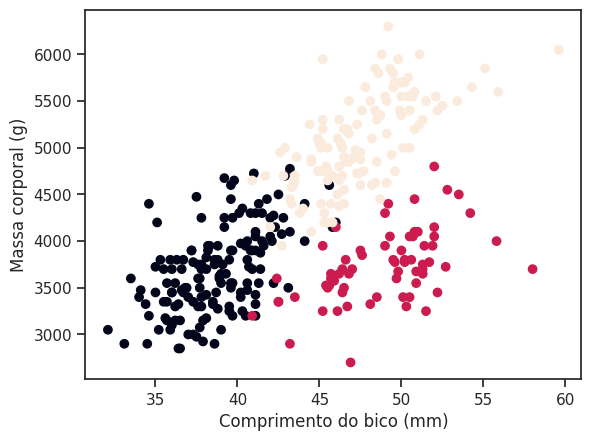

In [25]:
plt.scatter(df['bill_length_mm'], df['body_mass_g'], c=df['species'])
plt.xlabel('Comprimento do bico (mm)')
plt.ylabel('Massa corporal (g)')
plt.show()

<Axes: >

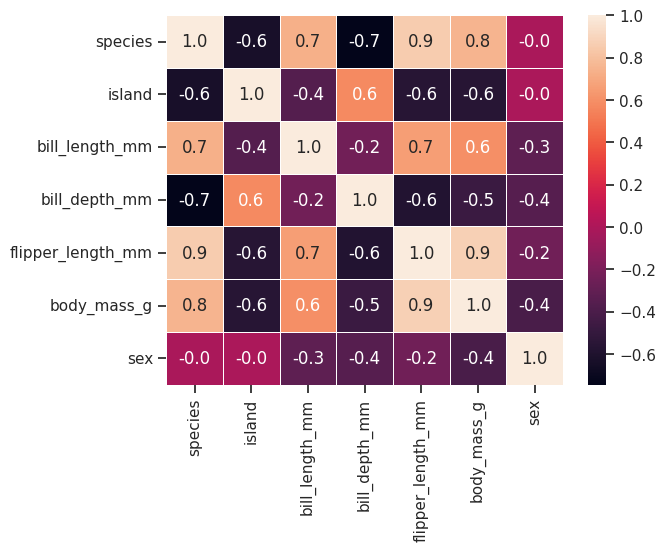

In [26]:
correlation = df.corr()
plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=0.6)
plot

In [27]:
X = pd.get_dummies(df.drop("species", axis=1))
y = df["species"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
modelo = DecisionTreeClassifier(random_state=42)
modelo.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

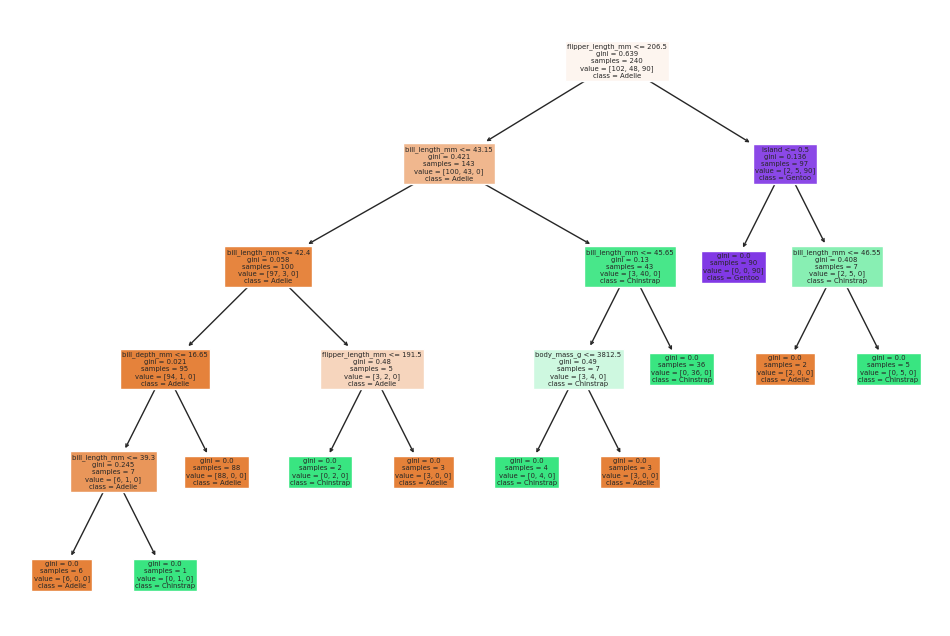

In [28]:
#Visualiza a árvore de decisão
fig, ax = plt.subplots(figsize=(12, 8))
plot_tree(modelo, filled=True, feature_names=X_train.columns, class_names=['Adelie', 'Chinstrap', 'Gentoo'], ax=ax)
plt.show()

In [39]:
filtro = X_train.loc[X_train['bill_length_mm'] <= 43.15]
filtro.describe()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,0.971698,38.664151,18.031132,190.207547,3685.613208,0.537736
std,0.786282,2.508621,1.495859,8.095521,475.418965,0.500943
min,0.000000,32.100000,13.100000,172.000000,2850.000000,0.000000
25%,0.000000,37.000000,17.200000,185.250000,3325.000000,0.000000
50%,1.000000,38.700000,18.100000,190.000000,3612.500000,1.000000
75%,2.000000,40.750000,18.900000,194.750000,3950.000000,1.000000
max,2.000000,43.100000,21.200000,215.000000,5000.000000,1.000000


In [41]:
filtro.insert(3, 'species', y_train)
filtro.describe()

,island,bill_length_mm,bill_depth_mm,species,flipper_length_mm,body_mass_g,sex
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,0.971698,38.664151,18.031132,0.122642,190.207547,3685.613208,0.537736
std,0.786282,2.508621,1.495859,0.451512,8.095521,475.418965,0.500943
min,0.000000,32.100000,13.100000,0.000000,172.000000,2850.000000,0.000000
25%,0.000000,37.000000,17.200000,0.000000,185.250000,3325.000000,0.000000
50%,1.000000,38.700000,18.100000,0.000000,190.000000,3612.500000,1.000000
75%,2.000000,40.750000,18.900000,0.000000,194.750000,3950.000000,1.000000
max,2.000000,43.100000,21.200000,2.000000,215.000000,5000.000000,1.000000


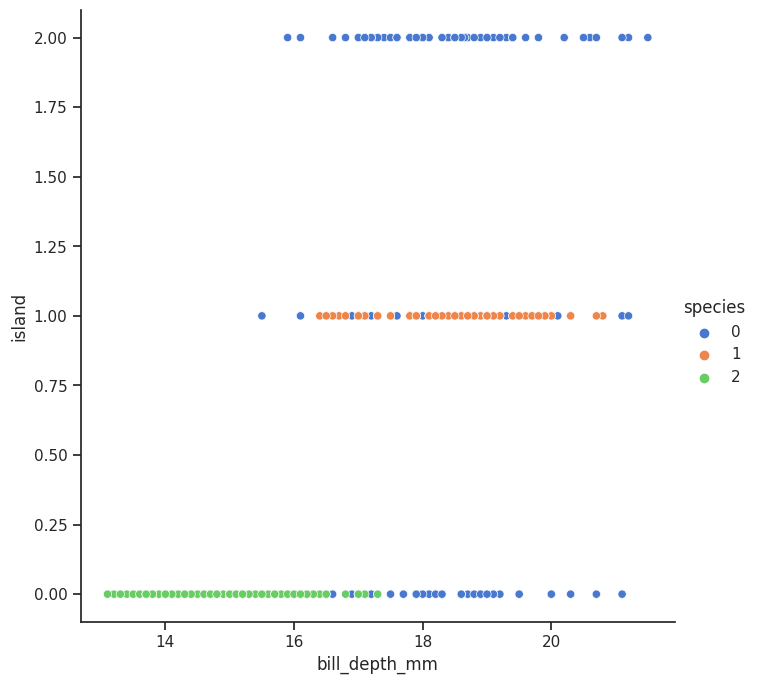

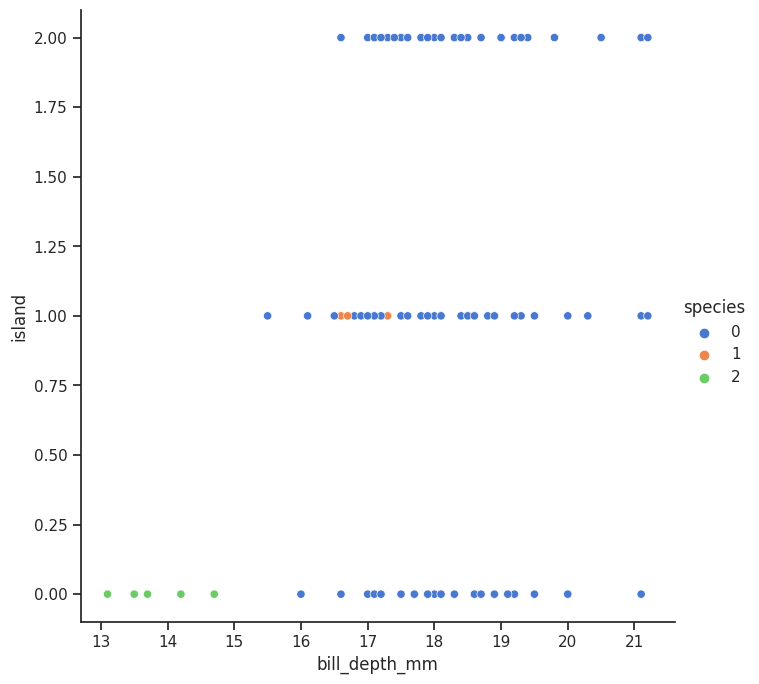

In [42]:
sns.relplot(x="bill_depth_mm", y="island", data=df, hue='species', palette='muted', height=7);
# Com o gráfico abaixo podemos afirmar que não temos possibilidade de ser espécie Gentoo 
# com valor de bill_depth_mm maior do que 18. (gráfico feito usando o dataframe completo)
# Além disso, na ilha Biscoe, há uma confusão para previsão da espécie Chinstrap e Adelie.

sns.relplot(x="bill_depth_mm", y="island", data=filtro, hue='species', palette='muted', height=7);
# Com o gráfico abaixo podemos afirmar que não temos a espécie Gentoo 
# com valor de bill_depth_mm maior do que 15. (gráfico feito usando o filtro aplicado)


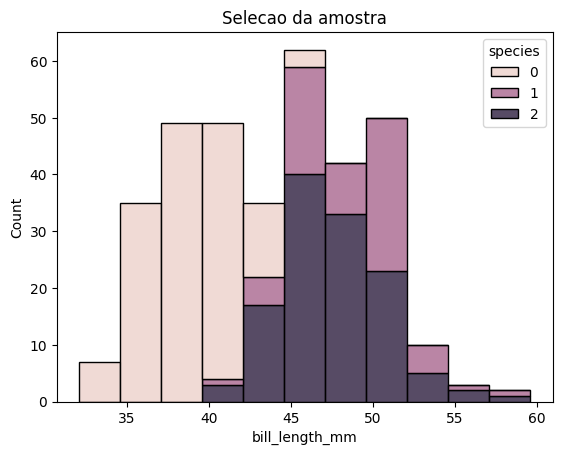

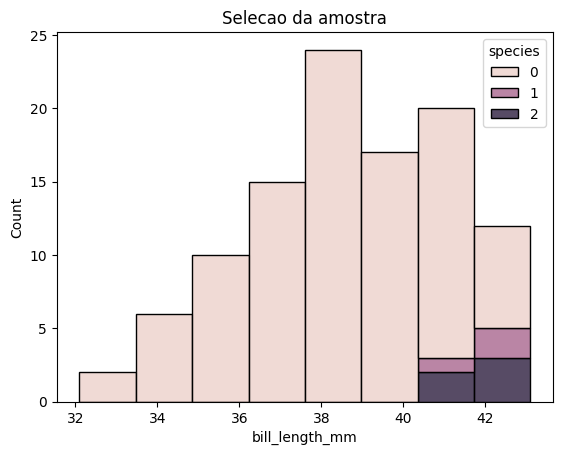

In [ ]:
sns.histplot(data=df, x='bill_length_mm', hue='species', multiple='stack', alpha=0.8)
#sns.histplot(data=teste[~filtro], x='bill_length_mm', hue='species', multiple='stack', alpha=0.8)
plt.title('Selecao da amostra')
plt.show()
#Visualizando a distribuição das espécies em relação ao filtro escolhido
sns.histplot(data=filtro, x='bill_length_mm', hue='species', multiple='stack', alpha=0.8)
#sns.histplot(data=teste[~filtro], x='bill_length_mm', hue='species', multiple='stack', alpha=0.8)
plt.title('Selecao da amostra')
plt.show()
#Comparando os 2 gráficos gerados, vemos que com o filtro aplicado não temos a espécie Gentoo 
# até que o valor de bill_length_mm seja maior do que 40. Já com o dash df não filtrado, vemos que
# temos a espécie Gentoo com bill_length_mm levemente menor que 40. A diferença não é muita, mas ajuda 
# a reforçar a diferença que o filtro manual aleatório pode fazer. Filtrar um dataset ou ter uma amostra
# muito pequena pode levar a resultados e interpretações que não condizem com a realidade.

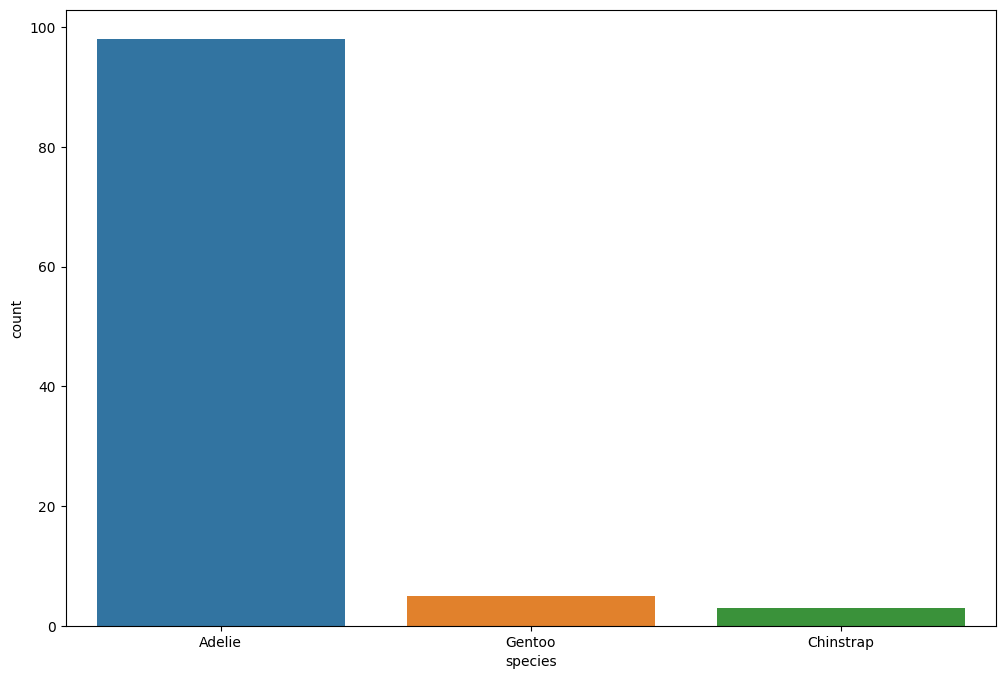

In [ ]:

plt.figure(figsize=(12, 8))
sns.countplot(x="species", data=filtro);

Cálculo do peso que cada variável independente tem na predição da espécie do pinguim

In [ ]:
importances = modelo.feature_importances_
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
print()
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];
# Com base nesses resultados, podemos afirmar que as únicas variáveis que impactam na predição de espécie são:
# flipper_length_mm, bill_length_mm, island_Dream, island_Torgersen, sendo a lista em ordenada crescente.


Variable: flipper_length_mm    Importance: 0.52
Variable: bill_length_mm       Importance: 0.37
Variable: island_Biscoe        Importance: 0.07
Variable: body_mass_g          Importance: 0.02
Variable: sex_MALE             Importance: 0.02
Variable: bill_depth_mm        Importance: 0.0
Variable: island_Dream         Importance: 0.0
Variable: island_Torgersen     Importance: 0.0
Variable: sex_FEMALE           Importance: 0.0


Avaliando a performance do modelo


In [ ]:
y_pred=modelo.predict(X_test)

# Avaliação
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Adelie       0.98      0.96      0.97        50
   Chinstrap       0.86      0.95      0.90        20
      Gentoo       1.00      0.97      0.99        34

    accuracy                           0.96       104
   macro avg       0.95      0.96      0.95       104
weighted avg       0.96      0.96      0.96       104

